# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**JS1 GROUP: Gift SS Nhlenyama, Nokuphila Simelane, Kgotatso Melvy Malapane, Paulina Kolobe, Bethuel Masango**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Model Evaluation</a>

<a href=#five>5. Model Selection</a>

<a href=#five>5. Model Tuning</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>


## 1. Importing Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = []


## 2. Loading the Data

* The dataset is split into the training data and test data and is loaded using pandas from csv files

In [4]:
# load the data
train_data = pd.read_csv("df_train.csv")
test_data = pd.read_csv("df_test.csv")
train_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333


## 3. Exploratory Data Analysis (EDA)

1. We will begin by exploring the shape of our data, this includes:
    - Finding out the number of rows and columns
    - Obtaining the data types: what are the data types of columns, essentially,
      trying to understand how many features are numerical or categorical, the composition of our data.
2. We will split our data into numerical data and categorical data. We investigate relationships between the variables
   and relationships with the target variable by looking at the correlation of the data to the target variable and 
   each variable against another
3. We will perform statistical analysis on the data: and visualise distributions with histograms, density plots and scatter
   plot diagrams
         
  




In [34]:
train_data.shape

(8763, 49)

In [35]:
#find out the number of each datatype in our data 
print(train_data.dtypes.value_counts())

float64    45
object      3
int64       1
dtype: int64


<AxesSubplot:>

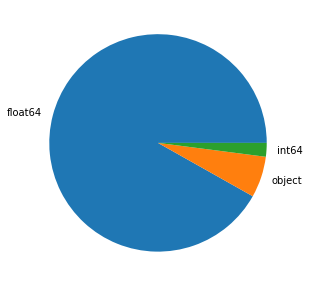

In [36]:
train_data.dtypes.value_counts().plot(kind='pie', ylabel="", figsize=(5,5))

In [37]:
#checking for possible missing values
print(train_data.isnull().sum())

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

#### The data composition: observations

* The data contains 49 columns and 8763 rows
* A significant number of features are floating point variables 45/49
* 1 column is of an integer type. Both the float and integer columns constitute to numerical input features 1/49
  We will investigate the correlation of numerical feautures
* The are 3 input features that are categorical: Bar charts will help us understand the categories in each column we will convert these variables to numeric form to prepare for modelling
* it can be deduced that Valencia_pressure is the single column containing null\nvalues (missing values), we aim to fill these empty values with the mean of the column or the median

In [5]:
cat_data = train_data[['time','Valencia_wind_deg','Seville_pressure']]
num_data = train_data.drop(cat_data.columns,axis=1)

#### Statistical analysyis of numerical data

In [39]:
#Looking at the summary of data
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


##### Investigating Skewness/Kurtosis of numerical variables

* Skewness can be defined the measure of symmetry or more precisely, the lack of symmetry.
* Kurtosis is the measure of how heavy its tails are compared to a normal distribution

<AxesSubplot:>

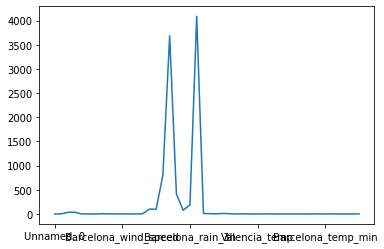

In [40]:
num_data.kurtosis().plot()

In [41]:
num_data.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

#### Kurtosis Observations
The kurtosis values of the following variables ar large, i.e >3:

[Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.]

This indicates  the presence of outliers, Valencia_snow and Barcelona_pressure are significantly higher than other variables measuring the same data.
Barcelona pressure could be dropped from observation
The large values in Barcelona could be due to an error or changes in weather conditions

'There is a significant number of outliers in this feature'

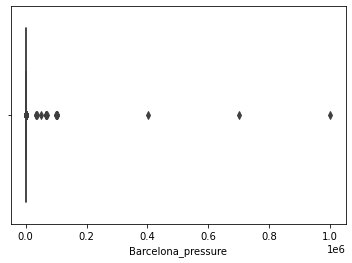

In [42]:
#Visualizing Barcelona Pressure data
sns.boxplot(x='Barcelona_pressure', data=train_data)

"""There is a significant number of outliers in this feature"""


<AxesSubplot:xlabel='Valencia_wind_speed'>

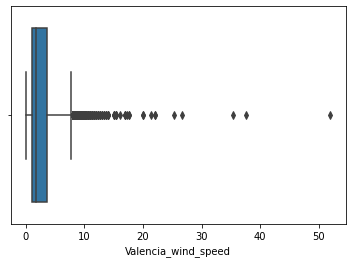

In [43]:
#Visualizing the Valencia_wind_speed data
sns.boxplot(x='Valencia_wind_speed', data=train_data)

In [44]:
num_data.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

<AxesSubplot:>

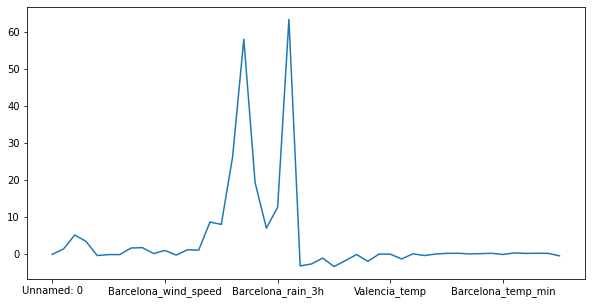

In [45]:
#Checking for outliers in the different columns
plt.figure(figsize = [10,5])
num_data.skew(axis=0, skipna=True).plot()


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>],
       [<AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_sn

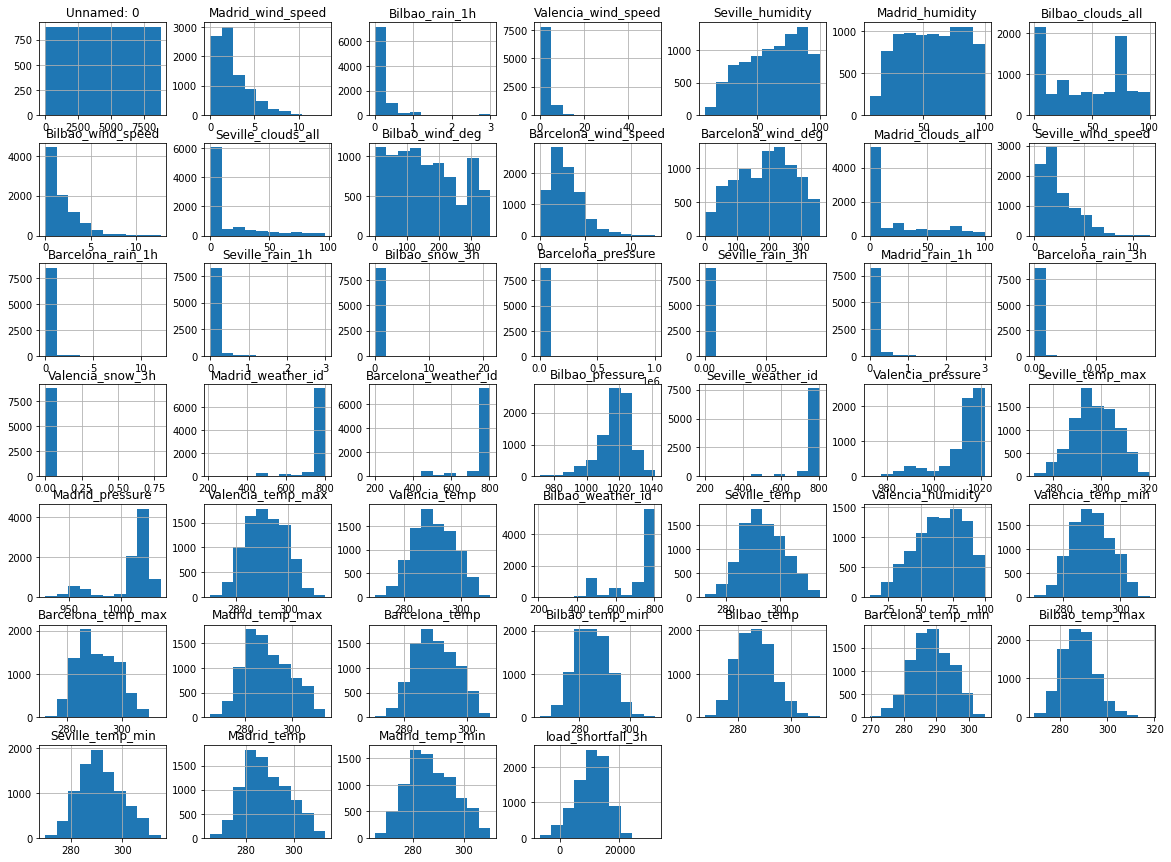

In [46]:
### Let us check the Distribution of our Data

# histogram

num_data.hist(figsize=(20,15))




#### Analysing Categorical Features

The dataset has 3 categorical features time,Valencia_wind_deg and Seville_pressure:
We investigate if any relationship exists between the the time and target variable load_shortfall_3h, example seasonality observed?
Time is provided as a timestamp:
we can segment it into:

* Year
* Month
* Days
* Hours


In [6]:
#Pivot table of Hour of the day and date against the load_shortfall_3h
dftime = cat_data.copy()
dftime['Date'] = dftime.time.apply(lambda x: str(x).split(" ")[0])
dftime['Hour'] = dftime.time.apply(lambda x: str(x).split(" ")[1].split(":")[0])
dftime['load_shortfall_3h'] = num_data['load_shortfall_3h']
df3 = pd.pivot_table(dftime, values='load_shortfall_3h', index='Hour', columns='Date')
df3

Date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
00,NaN,10866.000000,7125.333333,2806.333333,4540.000000,10156.000000,14897.333333,15496.666667,11674.000000,14980.000000,...,18837.666667,14606.666667,14797.333333,11762.666667,7077.000000,6170.333333,9013.666667,7243.666667,8194.333333,7801.000000
03,6715.666667,-1850.333333,623.000000,2710.000000,6379.666667,9528.666667,12249.333333,9562.000000,12438.333333,13259.333333,...,10949.666667,8503.666667,8962.000000,9372.666667,1962.333333,-3467.000000,258.666667,1501.333333,119.000000,3702.666667
06,4171.666667,-4002.333333,-2679.333333,1281.333333,7973.666667,8738.000000,10998.000000,7215.666667,10727.333333,12592.000000,...,7458.666667,4812.666667,5520.000000,5799.000000,-238.666667,-6292.666667,-3311.666667,-2451.333333,-4277.000000,-380.666667
09,4274.666667,-2893.000000,-1478.000000,5200.000000,1129.333333,14337.000000,13965.666667,7389.333333,13480.666667,15272.333333,...,13252.333333,8572.000000,7192.666667,4793.000000,6744.333333,132.333333,2792.666667,4482.000000,-1874.333333,-28.333333
12,5075.666667,539.333333,2212.666667,5179.333333,3238.333333,15028.333333,16370.666667,10836.333333,15760.000000,14794.000000,...,14983.000000,13768.000000,12131.666667,7173.666667,11623.666667,7506.333333,9291.000000,9859.666667,4804.000000,2266.666667
15,6620.666667,65.000000,145.000000,4187.333333,NaN,14496.000000,14613.666667,11568.666667,16059.666667,13463.666667,...,13281.000000,12505.333333,11881.000000,6890.333333,8698.666667,6393.333333,8421.666667,8431.666667,3841.000000,822.000000
18,6842.000000,-1317.000000,-2013.000000,2845.333333,NaN,13313.666667,14671.000000,11475.333333,15008.000000,12491.000000,...,12529.000000,12190.666667,11738.333333,2097.000000,6720.666667,6418.666667,7050.000000,7714.000000,4215.333333,-760.000000
21,10760.333333,5849.333333,2435.666667,2350.000000,5385.000000,14642.333333,15614.000000,11432.666667,13923.666667,13905.666667,...,15358.000000,15419.666667,13920.000000,6953.666667,8775.333333,9557.000000,7720.666667,9286.333333,7674.666667,2780.666667


<AxesSubplot:xlabel='time'>

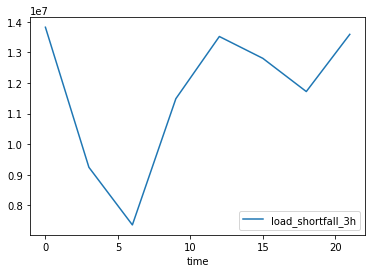

In [48]:
train_data.groupby([train_data['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True)

In [49]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.month])['load_shortfall_3h'].mean(),
        title = 'Month of the year against Load_shortfall_3h',
        y='load_shortfall_3h', width =800, height=400)

#Also the plot above, indicates a higher 'load short fall' from middle of June down to December """


#### Investigating Correlation of numerical data

In [7]:
corr = num_data.corr()
s = corr.unstack()
sorted_pairs = s.sort_values(kind='quicksort', ascending=False)

In [51]:
#Data that is positively correlated to the target variable:load_shortfall_3h
pos_corr = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] > 0]
pos_corr.head(10)

load_shortfall_3h     1.000000
Valencia_temp_min     0.201863
Barcelona_temp_min    0.195984
Unnamed: 0            0.192612
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
Bilbao_temp           0.176411
Madrid_temp_min       0.174744
dtype: float64

<AxesSubplot:>

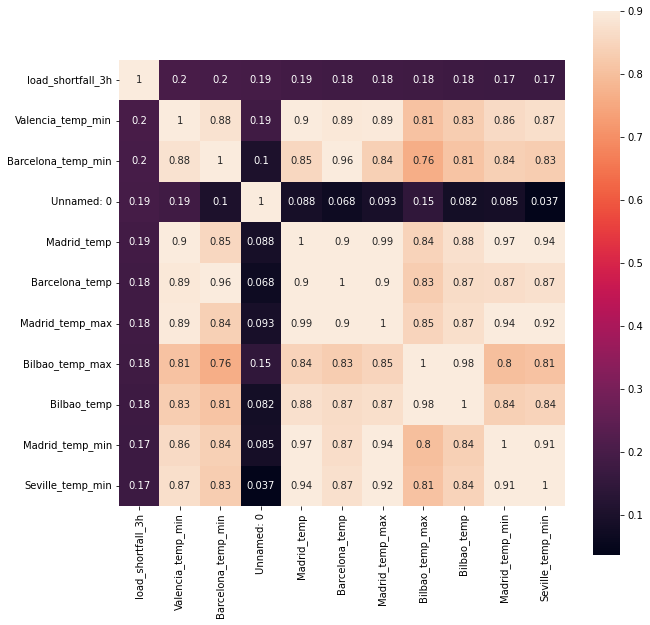

In [52]:
#positively correlated matrix
positive_corr_variables = ['load_shortfall_3h','Valencia_temp_min','Barcelona_temp_min','Unnamed: 0',           
'Madrid_temp',         
'Barcelona_temp',        
'Madrid_temp_max',       
'Bilbao_temp_max',       
'Bilbao_temp',           
'Madrid_temp_min',
'Seville_temp_min']
corrmat = num_data[positive_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=.9, square=True, annot=True)

#### Observation of positively correlated data

In [8]:
#Data that is negatively correlated to the target variable:load_shortfall_3h
neg_corr = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] < 0]
neg_corr.head(10)

Valencia_snow_3h     -0.021633
Barcelona_rain_3h    -0.024720
Madrid_rain_1h       -0.027159
Seville_rain_1h      -0.031572
Bilbao_snow_3h       -0.031721
Seville_rain_3h      -0.032945
Barcelona_pressure   -0.034385
Seville_wind_speed   -0.048433
Barcelona_rain_1h    -0.056633
Bilbao_wind_speed    -0.081602
dtype: float64

<AxesSubplot:>

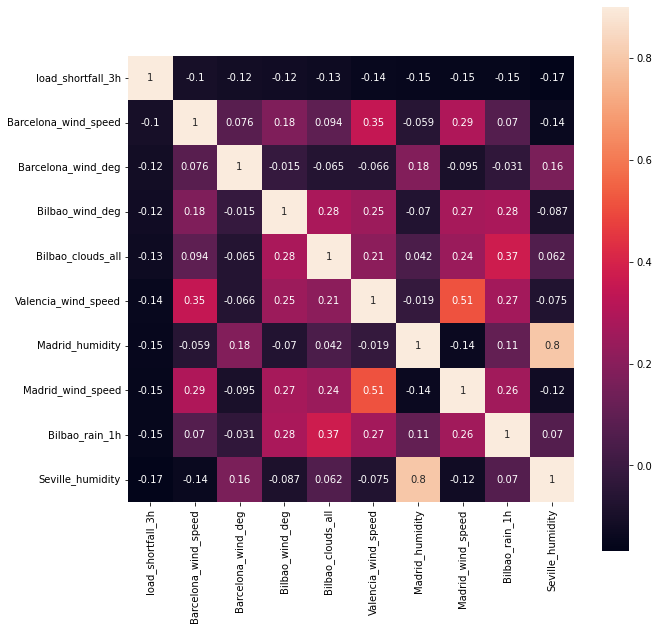

In [54]:
negative_corr_variables = ['load_shortfall_3h','Barcelona_wind_speed',
'Barcelona_wind_deg',
'Bilbao_wind_deg',
'Bilbao_clouds_all',
'Valencia_wind_speed',    
'Madrid_humidity',   
'Madrid_wind_speed',
'Bilbao_rain_1h',
'Seville_humidity']
corrmatneg = num_data[negative_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmatneg, vmax=.9, square=True, annot=True)

In [55]:
sorted_pairs[46:].head(20)

Madrid_temp         Madrid_temp_max       0.988871
Madrid_temp_max     Madrid_temp           0.988871
Valencia_temp       Valencia_temp_max     0.987533
Valencia_temp_max   Valencia_temp         0.987533
Valencia_temp_min   Valencia_temp         0.985479
Valencia_temp       Valencia_temp_min     0.985479
Bilbao_temp_min     Bilbao_temp           0.982936
Bilbao_temp         Bilbao_temp_min       0.982936
Bilbao_temp_max     Bilbao_temp           0.981624
Bilbao_temp         Bilbao_temp_max       0.981624
Barcelona_temp_max  Barcelona_temp        0.974480
Barcelona_temp      Barcelona_temp_max    0.974480
Madrid_temp         Madrid_temp_min       0.973641
Madrid_temp_min     Madrid_temp           0.973641
Barcelona_temp_min  Barcelona_temp        0.964089
Barcelona_temp      Barcelona_temp_min    0.964089
Seville_temp_min    Seville_temp          0.955160
Seville_temp        Seville_temp_min      0.955160
Valencia_temp_max   Valencia_temp_min     0.949377
Valencia_temp_min   Valencia_te

array([[<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp'>],
       [<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp_min'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp_min'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp_min'>],
       [<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp_max'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp_max'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp_max'>]],
      dtype=object)

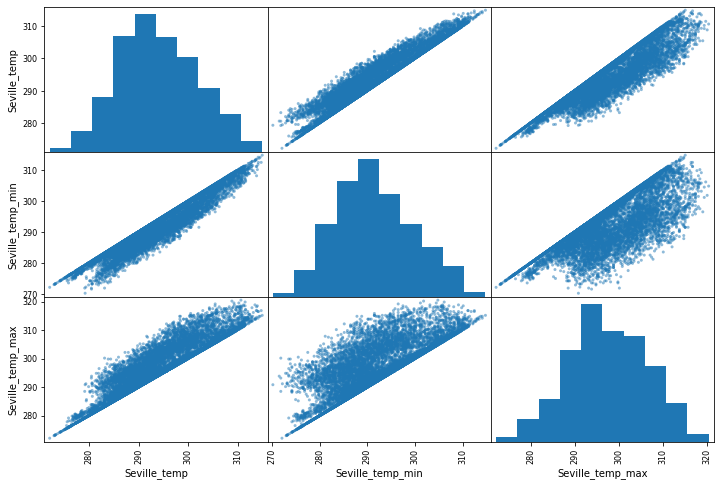

In [56]:
attr= ['Seville_temp','Seville_temp_min','Seville_temp_max']
scatter_matrix(num_data[attr], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Valencia_temp', ylabel='Valencia_temp'>,
        <AxesSubplot:xlabel='Valencia_temp_min', ylabel='Valencia_temp'>,
        <AxesSubplot:xlabel='Valencia_temp_max', ylabel='Valencia_temp'>],
       [<AxesSubplot:xlabel='Valencia_temp', ylabel='Valencia_temp_min'>,
        <AxesSubplot:xlabel='Valencia_temp_min', ylabel='Valencia_temp_min'>,
        <AxesSubplot:xlabel='Valencia_temp_max', ylabel='Valencia_temp_min'>],
       [<AxesSubplot:xlabel='Valencia_temp', ylabel='Valencia_temp_max'>,
        <AxesSubplot:xlabel='Valencia_temp_min', ylabel='Valencia_temp_max'>,
        <AxesSubplot:xlabel='Valencia_temp_max', ylabel='Valencia_temp_max'>]],
      dtype=object)

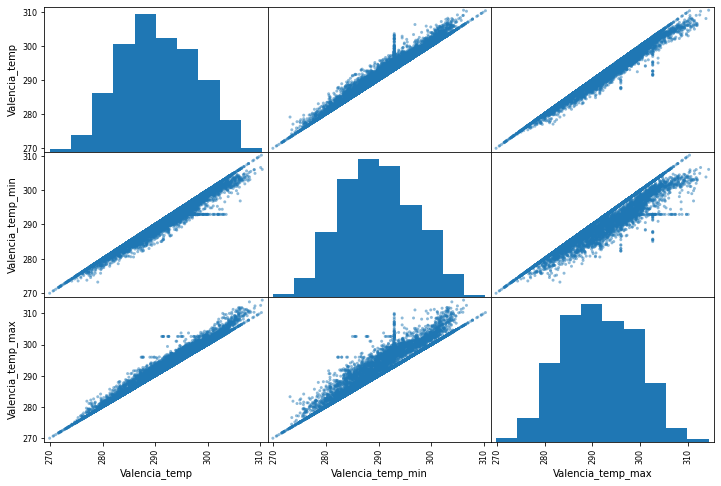

In [57]:
attrValencia= ['Valencia_temp','Valencia_temp_min','Valencia_temp_max']
scatter_matrix(num_data[attrValencia], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Madrid_temp', ylabel='Madrid_temp'>,
        <AxesSubplot:xlabel='Madrid_temp_min', ylabel='Madrid_temp'>,
        <AxesSubplot:xlabel='Madrid_temp_max', ylabel='Madrid_temp'>],
       [<AxesSubplot:xlabel='Madrid_temp', ylabel='Madrid_temp_min'>,
        <AxesSubplot:xlabel='Madrid_temp_min', ylabel='Madrid_temp_min'>,
        <AxesSubplot:xlabel='Madrid_temp_max', ylabel='Madrid_temp_min'>],
       [<AxesSubplot:xlabel='Madrid_temp', ylabel='Madrid_temp_max'>,
        <AxesSubplot:xlabel='Madrid_temp_min', ylabel='Madrid_temp_max'>,
        <AxesSubplot:xlabel='Madrid_temp_max', ylabel='Madrid_temp_max'>]],
      dtype=object)

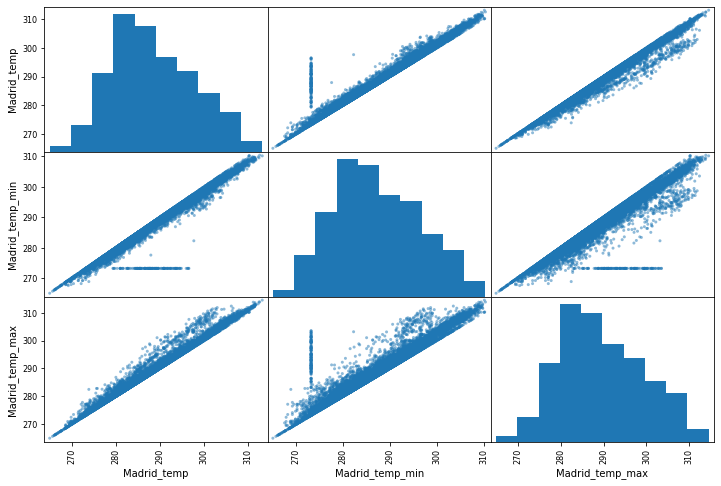

In [58]:
attrMadrid= ['Madrid_temp','Madrid_temp_min','Madrid_temp_max']
scatter_matrix(num_data[attrMadrid], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Barcelona_temp', ylabel='Barcelona_temp'>,
        <AxesSubplot:xlabel='Barcelona_temp_min', ylabel='Barcelona_temp'>,
        <AxesSubplot:xlabel='Barcelona_temp_max', ylabel='Barcelona_temp'>],
       [<AxesSubplot:xlabel='Barcelona_temp', ylabel='Barcelona_temp_min'>,
        <AxesSubplot:xlabel='Barcelona_temp_min', ylabel='Barcelona_temp_min'>,
        <AxesSubplot:xlabel='Barcelona_temp_max', ylabel='Barcelona_temp_min'>],
       [<AxesSubplot:xlabel='Barcelona_temp', ylabel='Barcelona_temp_max'>,
        <AxesSubplot:xlabel='Barcelona_temp_min', ylabel='Barcelona_temp_max'>,
        <AxesSubplot:xlabel='Barcelona_temp_max', ylabel='Barcelona_temp_max'>]],
      dtype=object)

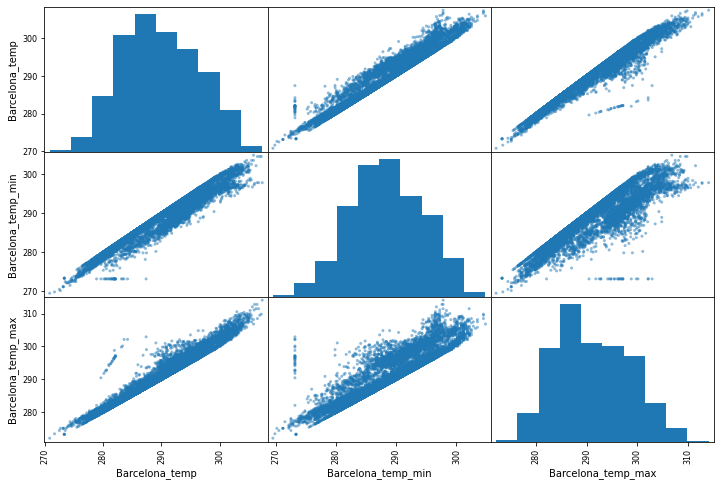

In [59]:
attrBarcelona= ['Barcelona_temp','Barcelona_temp_min','Barcelona_temp_max']
scatter_matrix(num_data[attrBarcelona], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp'>],
       [<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp_min'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp_min'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp_min'>],
       [<AxesSubplot:xlabel='Seville_temp', ylabel='Seville_temp_max'>,
        <AxesSubplot:xlabel='Seville_temp_min', ylabel='Seville_temp_max'>,
        <AxesSubplot:xlabel='Seville_temp_max', ylabel='Seville_temp_max'>]],
      dtype=object)

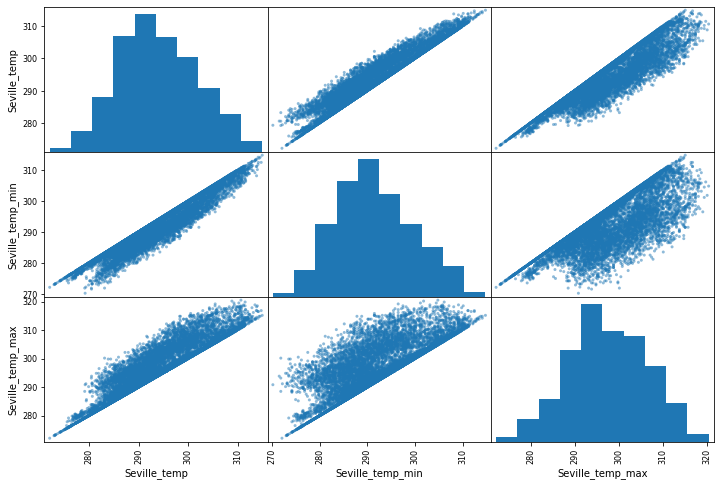

In [60]:
attrBilbao= ['Bilbao_temp','Bilbao_temp_min','Bilbao_temp_max']
scatter_matrix(num_data[attr], figsize=(12, 8))

In [61]:
### Observation of correlated pairs

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

We will be carrying out Feature Engineering in this section of our notebook. 
We have highlighted some key points to consider - 
   * Why should we use Feature Engineering in data science?
   * Feature Selection/Importance
   * Handling missing values
   * Handling outliers
   * Feature Scaling
### Why engineer?
In Data Science, the performance of the model is dependent on data preprocessing and data handling. Suppose if we build a model without Handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more.
Simply, by using Feature Engineering we improve the performance of the model.
CONT'D -- As we saw in the previous section (EDA), we highlighted some columns to be dropped as well as columns with categorical values.
We will now do the following:



Drop the Unnammed Column
   - Connvert both Seville_pressure and Valencia_wind_degree columns from categorical to numerical values.
Also, we will be converting or downsampling the **Time** column to various date/time format viz;
  
   - Year
   - Month of the Year
   - Week of the Year
   - Day of the Year
   - Day of the Month
   - Day of the Week
   - Hour of the Week
   - Hour of the Day


This will enable us have a better and larger expression of our data during modeling

The next step is to engineer new features from the time column

In [9]:
#Filling missing values
train_data['Valencia_pressure'].fillna(train_data['Valencia_pressure'].mean(), inplace = True)


In [10]:
# engineer existing features
"""First we will start by Transforming the Valencia_wind_deg and Seville_pressure columns to numeric.
This is done to ensure uniformity (numeric values) in our model"""

train_data['Valencia_wind_deg'] = train_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
train_data['Seville_pressure'] = train_data['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [11]:
#Engineering New Features ( i.e Desampling the Time) that will help us in our modeling

"""
We had to convert the time type from an object to a datetime format using the 'astype' method before desampling
"""
train_data['Year']  = train_data['time'].astype('datetime64').dt.year
train_data['Month_of_year']  = train_data['time'].astype('datetime64').dt.month
train_data['Week_of_year'] = train_data['time'].astype('datetime64').dt.weekofyear
train_data['Day_of_year']  = train_data['time'].astype('datetime64').dt.dayofyear
train_data['Day_of_month']  = train_data['time'].astype('datetime64').dt.day
train_data['Day_of_week'] = train_data['time'].astype('datetime64').dt.dayofweek
train_data['Hour_of_week'] = ((train_data['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - train_data['time'].astype('datetime64').dt.hour)
train_data['Hour_of_day']  = train_data['time'].astype('datetime64').dt.hour

C:\Users\nokph\AppData\Local\Temp\ipykernel_17632\2359263274.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data['Week_of_year'] = train_data['time'].astype('datetime64').dt.weekofyear


<AxesSubplot:>

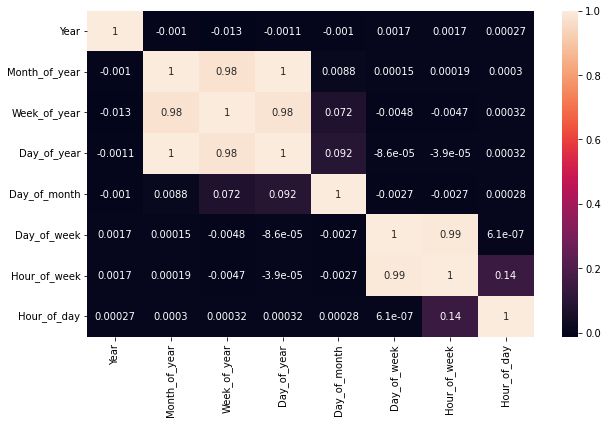

In [12]:
"""We'll have a look at the correlation(s) between our newly created temporal features"""

Time_df = train_data.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

Looking at our heatmap tells us that we have high Multicollinearity present in our new features.
The features involved are  - 
- Week of the year
- Day of the year
- Month of the year
- Day of the week
- Hour of the week
We would have to drop either one of the  features that have high correlation with each other
Alongside dropping these features mentioned above, we would also be dropping the time and Unnamed column


In [13]:
train_data = train_data.drop(columns=['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0','time'])

### Feature Importance/Selection
Feature selection is the process where you automatically or manually select the features that contribute the most to your prediction variable or output. Selecting the important independent features which have more relation with the dependent feature will help to build a good model. There are some methods for feature selection:
**Feature importance** gives you a score for each feature of your data. The higher the score, the more important or relevant that feature is to your target feature.
Feature importance is an inbuilt class that comes with tree-based classifiers such as:
    Random Forest Classifiers
    Extra Tree Classifiers
##### Correlation Matrix with Heatmap
Heatmap is a graphical representation of 2D (two-dimensional) data. Each data value represented in a matrix.
First, we'll plot the pair plot between all independent features and dependent features. It will give the relation between dependent and independent features. The relation between the independent feature and the dependent feature is less than 0.2 then choose that independent feature for building a model.
"""

<AxesSubplot:>

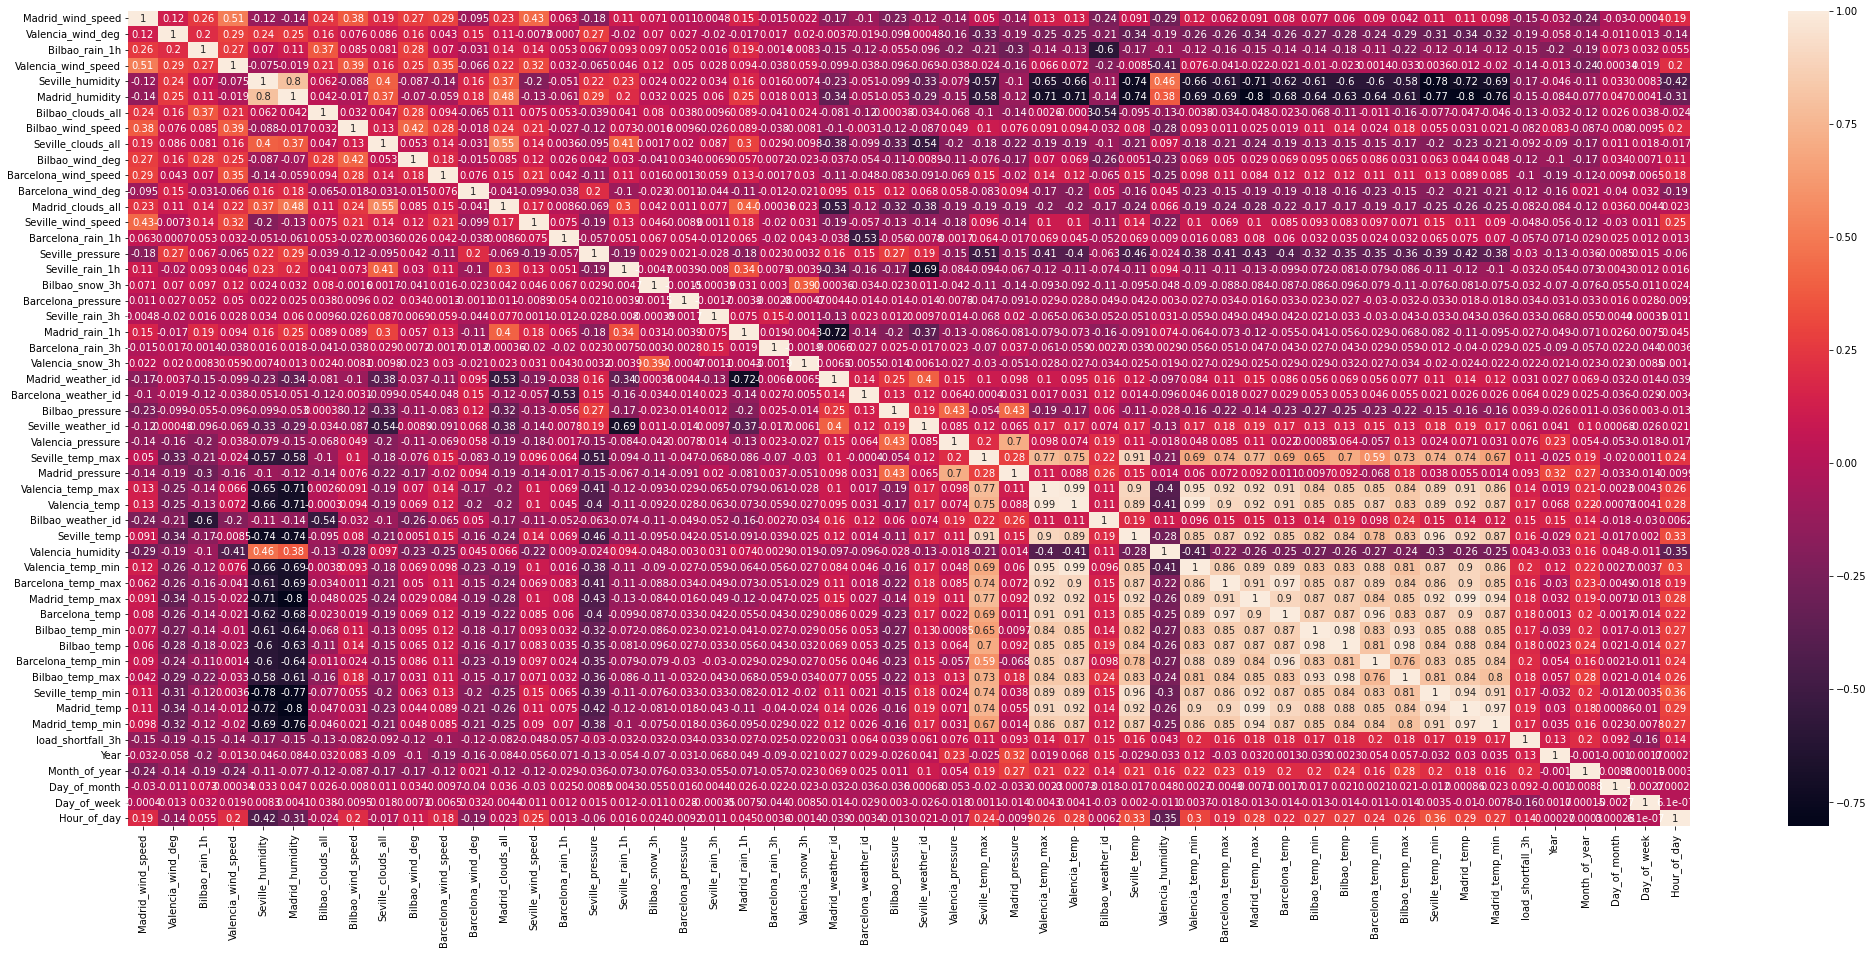

In [14]:
plt.figure(figsize=[35,15])
sns.heatmap(train_data.corr(),annot=True )

In [15]:
## Splitting our data into dependent Variable and Independent Variable
X = train_data.drop(columns = 'load_shortfall_3h')
y = train_data['load_shortfall_3h'].astype('int')

In [16]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) #To get the least important feature based on ther score

#draw bar chart

,Features,Score
22,Valencia_snow_3h,3110.383507
37,Madrid_temp_max,2281.817118
44,Madrid_temp,2106.588763
45,Madrid_temp_min,2054.920443
28,Seville_temp_max,1847.097423
43,Seville_temp_min,1589.866015
33,Seville_temp,1483.057026
30,Valencia_temp_max,1365.685590
36,Barcelona_temp_max,1260.724182
31,Valencia_temp,1229.799250


This result backups our claim, were we saw in the  heatmap multicollinearity between features, and from our feature selection, we can see those features as having the lowest significance in our data.
### Dropping Outliers
We have one more thing to do, which is to remove possible outliers. Also, we will select the important features for our model thus dropping others having multicollinearity

In [17]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]


<AxesSubplot:>

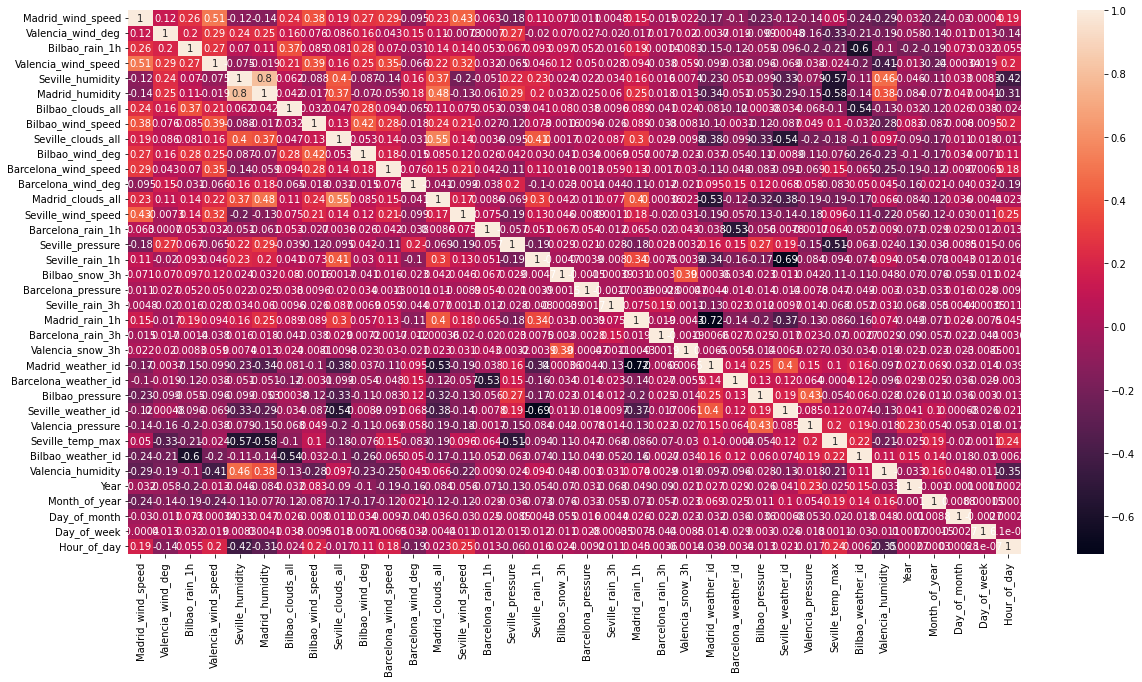

In [72]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True )

"""We have been able to remove the collinearity seen in previous heatmaps and also selected specific features to train our model.
### Feature Scaling
Lastly, before we carry out modeling, it is important to scale our data. As we saw during the EDA, we noticed how some columns(features) had values that were out of range when we compared their mean, max and  standard deviation. This can result to bias in the model during decision making, thus it is important to convert all the column values to a certain range/scale.
#### What is Feature Scaling?
Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.
In this project, we will be carrying out ***Standard Scaling***, becasue of it's **robustness** to outliers







In [18]:
# Create standardization object
scaler = StandardScaler()

In [19]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,0.352274,-1.129531e+00,-2.616796,0.649842,0.540928,-1.226179,-1.602429,-1.675368,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,0.352274,-9.289340e-01,-2.539014,0.649842,0.298645,-1.226179,-1.602429,-1.675368,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,0.352274,-8.085757e-01,-2.105564,0.649842,0.021750,-1.226179,-1.602429,-1.675368,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,0.352274,-3.672620e-01,-1.361703,0.649842,-0.583957,-1.226179,-1.602429,-1.675368,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,0.352274,1.368315e-14,-1.348214,0.649842,-0.358980,-1.226179,-1.602429,-1.675368,-0.00274,0.654899


In [20]:
y.head()

0    6715
1    4171
2    4274
3    5075
4    6620
Name: load_shortfall_3h, dtype: int32

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |
### Model Building
1. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
3. Build a Linear Regression model which would serve as our base model using the train data.
4. Try and improve the linear model by employing Lasso and Ridge
5. Try out other models like decision trees, Random Forest and SVR
---

In [21]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [22]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 36)
Training target: (7010,)
Testing predictor: (1753, 36)
Testing target: (1753,)


* We have been able to allocate 7010 features/observations to the training set of our data.
* We have also allocated the remainder i.e 1753 of observations to the testing set of our data.
**N/B** These values are as a result of the splitting ratio carried out, it is important to note that any change in the splitting ration would affect the value and shape of the training and testing sets
### Multiple linear regression model 
As our basline, we would first make use of *Linear Model*.    
The term linear model implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.

In [23]:
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
#predict on unseen data
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set

In [25]:
### Lasso Regression (L1 Norm)
"""Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).
The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection"""


'Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).\nThe lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection'

In [26]:
# Create LASSO model object, setting alpha to 0.01
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

In [27]:
"""### Ridge Regression (L2 Norm)
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity
"""

# Creating Ridge model
Ridge = Ridge()
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)

In [28]:
"""### Support Vector Regressor
While linear regression models minimize the error between the actual and predicted values through the line of best fit, SVR manages to fit the best line within a threshold of values.
SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class.  
The aim is to fit as many instances as possible between the lines while limiting the margin violations
"""

# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)

In [84]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)


In [32]:
"""### Decision Tree Model
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.
"""

# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

In [33]:
"""### Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model
"""

# Our forest consists of 200 trees with a max depth of 8 
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
# Fitting the model
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |
"""In this section of our notebook, we will evaluate the performance of **SIX  MODELS** we trained using metrics such as- 
 - Root Mean Squared Error (RMSE)
 - Mean Squared Error (MSE)
 - Mean Absolute Error (MAE)
 - Residual Sum of Squares Error (RSS) 
"""
---

In [34]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [35]:
print(Linear.head()) #Linear Model 
print('\n')
print(Lass_.head()) # Lasso Model
print('\n')
print(Ridge_.head()) # Ridge Model
print('\n')
print(Sv_.head()) #SVR Model
print('\n')
print(Des_.head()) #Decision Tree Model
print('\n')
print(Rand_.head()) # Random Forest Model

      Actual     Predicted
1226   11450  12402.636182
7903   13693  12245.041069
1559   18337  11989.975721
3621   -1221   9383.384417
7552    8515  14086.322696


      Actual     Predicted
1226   11450  12402.596545
7903   13693  12245.032510
1559   18337  11989.974822
3621   -1221   9383.406078
7552    8515  14086.234318


      Actual     Predicted
1226   11450  12402.251854
7903   13693  12244.719235
1559   18337  11990.023803
3621   -1221   9383.425692
7552    8515  14085.757950


      Actual     Predicted
1226   11450  11119.964057
7903   13693  11106.784848
1559   18337  11211.627698
3621   -1221  11021.139113
7552    8515  11220.062862


      Actual  Predicted
1226   11450     8593.0
7903   13693    11016.0
1559   18337    18497.0
3621   -1221      934.0
7552    8515    10368.0


      Actual     Predicted
1226   11450   7465.361176
7903   13693  16677.273576
1559   18337  14184.870846
3621   -1221   4723.343910
7552    8515  10651.134697


From the Predicted values above, we can see some models have values very close to the actual label, let us not get carried away as it doesn't tell the whole story.
Some of these results might be attributed to overfitting and also exposed to a lot of noise/outliers.
We will therefore test our model's performance based on the Metrics aforementioned in the previous cell.
#### Comparing the Root Mean Square Error across Models


In [39]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [40]:
# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,3871.701641
Lasso,4845.428409
Linear model,4845.426919
Random Forest,3352.647463
Ridge,4845.426261
SVR,5294.969170


In [41]:

px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple","yellow"],
       title="Model performance RMSE test",
       color = Model_Performance.index, 
       width =700, height=400)

In [42]:
"""From the graph above, we can confirm that the Random Forest model performs better than others in terms of **RMSE**
### Comparing the Mean Square Error across Models
"""
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [44]:
# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,1.499007e+07
Lasso,2.347818e+07
Linear model,2.347816e+07
Random Forest,1.124025e+07
Ridge,2.347816e+07
SVR,2.803670e+07


In [45]:

px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple","yellow"],
       title="Model performance MSE test",
       color = Model_Performance2.index, width =700, height=400)

In [46]:
"""From the graph above, we can confirm that the Random Forest model performs better than others in terms of **MSE**
### Comparing the Mean Absolute Error across Models
"""

Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }

In [47]:
# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

,Test MAE
Decision Tree,2795.033657
Lasso,3858.659602
Linear model,3858.656423
Random Forest,2652.118152
Ridge,3858.663652
SVR,4227.299991


In [48]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple","yellow"],
       title="Model performance MAE test",
       color = Model_Performance3.index, width =700, height=400)

In [49]:
"""From the graph above, we can confirm that the Random Forest model performs better than others in terms of **MSE**
### Comparing the R-Squared across Models
"""

Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

In [50]:
# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
Decision Tree,0.467724
Lasso,0.166323
Linear model,0.166324
Random Forest,0.600875
Ridge,0.166324
SVR,0.004456


In [51]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
color_discrete_sequence=[
                 "orange", "red", "green", "blue", "purple","yellow"],
       title="Model performance R^2 test",
       color = Model_Performance4.index, width =700, height=400)


From the graph above, we can confirm that the Random Forest model performs better than others in terms of R^2
From all of these Results, we will choose Random Forest for our model Predictions as it meets all the expectations for a regression model and gives better performing metric
* Random Forest has a higher R2 for Test data as compared to the other models.
* Random Forest again has a lower RMSE for both the Training and Test data as compared to the other models.
* We can therefore conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |
* Coefficient of determination (R2) measures the amount of variance in the predictions explained by the dataset. 
* It is the difference between the samples in the dataset and the predictions made by the model.
* It is measure from zero to one with one representing a perfect model and zero showing that the model will perform badly on unseen data.
* RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values. 
* It measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
* The smaller the RMSE of the model the better.
### Choosen method's logic:
* Initially we started building our model using linear regression.
* However a linear model is not appropriate for data that is not linear, it also suffers from multi-colinearity.
* Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
* Lasso regression helps in reducing overfitting but and in feature selection by setting coefficients with high values to zero.
* Decision trees are not affected by multicolinearity, they support non-linearity and are resistant to outliers further more they require little data preprocessing.
* However Decision trees are prone to overfitting and parameter tuning can led to biased learned trees if some classes dominate.
* Random forests address the problem of overfitting.
* They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the mean of the classes as the prediction of all the trees.
## Conclusion
* As aspiring data scientists we have developed a model that will assist in predicting the 3 hourly load shortfall of power generated by renewable sources in Spain .
* This will assist in informing the Spanish Government of any trends and patterns of the country's renewable resources and fossil fuel energy generation and whether it is viable to expand its' renewable energy resource infrastructure investments.
## Predicting Load_shortfall_3h
---

In [52]:
test_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [53]:
#Engineering New Features ( i.e Desampling the Time) that will help us in our modeling

test_data['Year']  = test_data['time'].astype('datetime64').dt.year
test_data['Month_of_year']  = test_data['time'].astype('datetime64').dt.month
test_data['Week_of_year'] = test_data['time'].astype('datetime64').dt.weekofyear
test_data['Day_of_year']  = test_data['time'].astype('datetime64').dt.dayofyear
test_data['Day_of_month']  = test_data['time'].astype('datetime64').dt.day
test_data['Day_of_week'] = test_data['time'].astype('datetime64').dt.dayofweek
test_data['Hour_of_week'] = ((test_data['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - test_data['time'].astype('datetime64').dt.hour)
test_data['Hour_of_day']  = test_data['time'].astype('datetime64').dt.hour


C:\Users\nokph\AppData\Local\Temp\ipykernel_17632\906864229.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [54]:
time = test_data['time']

In [55]:
#Filling missing values
test_data['Valencia_pressure'].fillna(test_data['Valencia_pressure'].mean(), inplace = True)

In [56]:
test_data = test_data[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [57]:
#Transforming Valencia_wind_deg to numeric
test_data['Valencia_wind_deg'] = test_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
test_data['Seville_pressure'] = test_data['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [58]:
test_data['load_shortfall_3h'] = RF.predict(test_data)

In [60]:
test_data['time'] = time

In [ ]:
load = test_data[['time','load_shortfall_3h']]

In [ ]:
load.to_csv('sample_submission_load_shortfall.csv', index = False)

In [ ]:
load